In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
from scipy.fftpack import fft, fftfreq
import scipy as sp

#import betterplot

from scipy import signal

import umap
import umap.plot

from matplotlib.ticker import MaxNLocator
from scatseisnet import ScatteringNetwork

from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.preprocessing import RobustScaler, MinMaxScaler


In [10]:


from sklearn.decomposition import FastICA, PCA, KernelPCA, SparsePCA, IncrementalPCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans

from fastcluster import linkage
from scipy.cluster.hierarchy import fcluster
import umap
# explained_variance_score
from sklearn.metrics import explained_variance_score
from matplotlib import colors
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.metrics import explained_variance_score

import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [11]:
freqmin = 1
freqmax = 8
sr = 40

reduce_type = np.mean

name_fig = 'figure07_comparison_two_simulations'

name = f"final_version/{name_fig}"

savepath = f"/bettik/dokhtdor/projects/mirko_volcano_simulations/figures/{name}/"

os.makedirs(savepath, exist_ok=True)



In [12]:


FILEPATH = "/bettik/dokhtdor/projects/mirko_volcano_simulations/dataset/"

vs = np.load(FILEPATH + 'vs_array.npy') 

data_s1 = np.hstack([np.load(FILEPATH + "z_r1.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r1.npy")[:, np.newaxis,:]] )
data_s2 = np.hstack([np.load(FILEPATH + "z_r2.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r2.npy")[:, np.newaxis,:]] )
data_s3 = np.hstack([np.load(FILEPATH + "z_r_s3.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r_s3.npy")[:, np.newaxis,:]] )
data_s4 = np.hstack([np.load(FILEPATH + "z_r_s4.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r_s4.npy")[:, np.newaxis,:]] )
data_s4_1 = np.hstack([np.load(FILEPATH + "new_data/z_r_s4_hor.npy")[:, np.newaxis,:], np.load(FILEPATH + "new_data/x_r_s4_hor.npy")[:, np.newaxis,:]] )
data_s4_1 = np.hstack([np.load(FILEPATH + "z_r_s4.npy")[:, np.newaxis,:], np.load(FILEPATH + "new_data/z_r_s4_hor.npy")[:, np.newaxis,:]] )
data_s4 = np.hstack([np.load(FILEPATH + "x_r_s4.npy")[:, np.newaxis,:], np.load(FILEPATH + "new_data/x_r_s4_hor.npy")[:, np.newaxis,:]] )

#data_s5 = np.hstack([np.load(FILEPATH + "z_r_s5.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r_s5.npy")[:, np.newaxis,:]] )

# Concatenating the sources 
data = np.concatenate([data_s4, data_s4_1], axis = 1) #+ 

# Filtering the data
#datafilter = filter(data[:, :], freqmin = freqmin, freqmax = freqmax, fs = 40, order = 2)


from scipy.signal import butter, sosfiltfilt

sos = butter(10, [freqmin, freqmax], 'bandpass', fs=sr, output='sos')
#datafilter = sosfiltfilt(sos, data[:,:,:], axis=-1)


datafilter = data[:, : ,:]#[:, np.newaxis, :]

#norm_two_channel  = np.sqrt(np.linalg.norm((data[:,:,:]), axis =2, keepdims=True)[:, 0, :]**2 + np.linalg.norm((data[:,:,:]), axis =2, keepdims=True)[:, 0, :]**2 )

# Normalizing the data

#data = datafilter

data = datafilter[:,:,::1] / np.linalg.norm(abs(datafilter[:, :, :]), ord = 2, axis = -1, keepdims=True)
#data = datafilter[:,:,::1] / np.max(abs(datafilter[:, :, :]),  axis = -1, keepdims=True)

#data  = data[:,:,::1] = data/ np.max(abs(data))




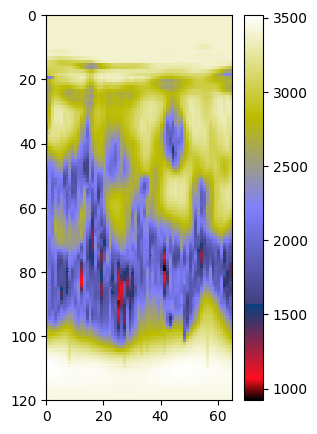

In [465]:
plt.figure(figsize=(3, 5))
plt.pcolor(vs.reshape(120, 65)[::1,::1], cmap = 'gist_stern')
plt.ylim(120, 0)
plt.colorbar()

In [14]:
t = np.arange(data.shape[-1]) * 1/sr

/tmp/ipykernel_793807/567013852.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


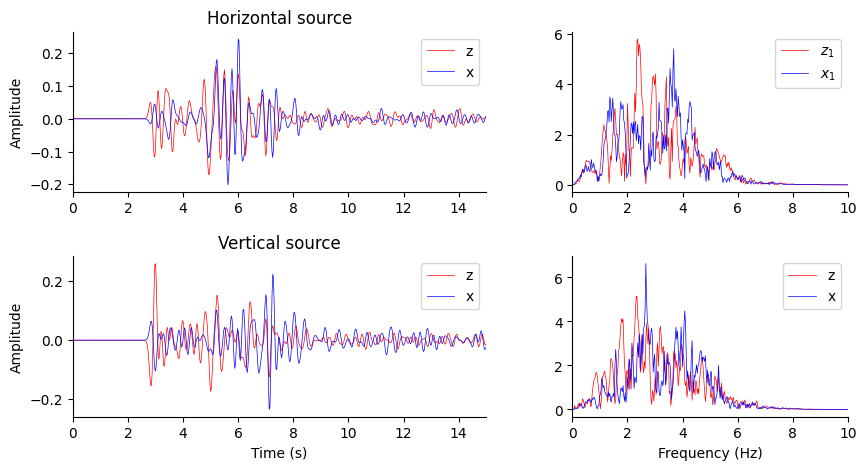

In [15]:
gs = {"hspace": 0.4, "wspace": 0.25, "width_ratios": [3, 2]}

fig, axs = plt.subplots(2, 2, figsize = (10, 5), gridspec_kw = gs)
indx = 6300
ax = axs[0, 0]
ax.plot(t, data[indx, 0, :], lw = 0.5, c= 'r', label = 'z')
ax.plot(t, data[indx, 1, :], lw = 0.5, c = 'b', label = 'x')
ax.set_title('Horizontal source')

ax.legend()
ax.set_xlim(0, 15)
ax.set_ylabel('Amplitude')

ax = axs[0, 1]
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 0, :])[:data.shape[-1]//2]), c = 'r', lw = 0.5, label = '$z_{1}$')
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 1, :])[:data.shape[-1]//2]), c = 'b', lw = 0.5, label = '$x_{1}$')
ax.set_xlim(0, 10)
ax.legend()

ax = axs[1, 0]
ax.plot(t, data[indx, 2, :], lw=0.5, c = 'r', label = 'z')
ax.plot(t, data[indx, 3, :], lw=0.5, c = 'b',  label = 'x')
ax.legend()
ax.set_xlim(0, 15)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Vertical source')


ax = axs[1, 1]
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 2, :])[:data.shape[-1]//2]), c = 'r', lw = 0.5, label = 'z')
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 3, :])[:data.shape[-1]//2]), c = 'b', lw = 0.5, label = 'x')
ax.set_xlabel('Frequency (Hz)')
ax.set_xlim(0, 10)
ax.legend()


for axn in axs.flat:
    axn.spines['top'].set_visible(False)
    axn.spines['right'].set_visible(False)


fig.tight_layout()
fig.savefig(savepath + f'comparision_waveform_{indx}.pdf', transparent=True, dpi = 300)


/tmp/ipykernel_793807/1256070642.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


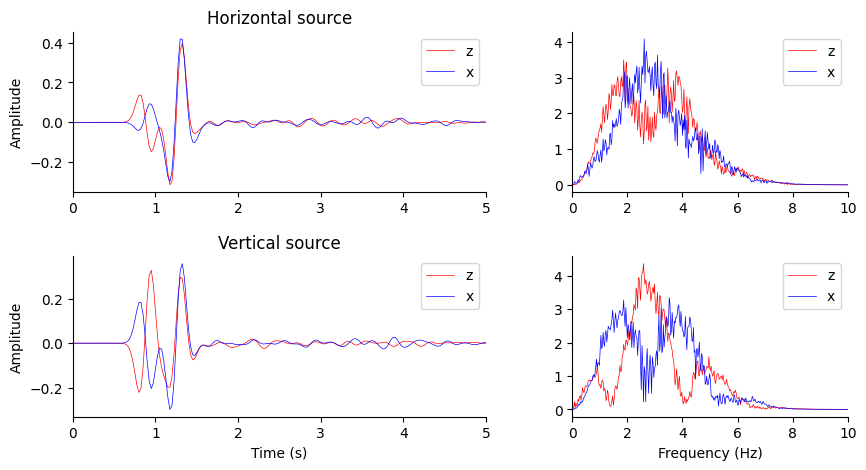

In [19]:
gs = {"hspace": 0.4, "wspace": 0.25, "width_ratios": [3, 2]}

fig, axs = plt.subplots(2, 2, figsize = (10, 5), gridspec_kw = gs)

indx = 100
ax = axs[0, 0]
ax.plot(t, data[indx, 0, :], lw = 0.5, c= 'r', label = 'z')
ax.plot(t, data[indx, 1, :], lw = 0.5, c = 'b', label = 'x')
ax.set_title('Horizontal source')

ax.legend()
ax.set_xlim(0, 5)
ax.set_ylabel('Amplitude')

ax = axs[0, 1]
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 0, :])[:data.shape[-1]//2]), c = 'r', lw = 0.5, label = 'z')
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 1, :])[:data.shape[-1]//2]), c = 'b', lw = 0.5, label = 'x')
ax.set_xlim(0, 10)
ax.legend()


ax = axs[1, 0]
ax.plot(t, data[indx, 2, :], lw=0.5, c = 'r', label = 'z')
ax.plot(t, data[indx, 3, :], lw=0.5, c = 'b',  label = 'x')
ax.legend()
ax.set_xlim(0, 5)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Vertical source')

ax = axs[1, 1]
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 2, :])[:data.shape[-1]//2]), c = 'r', lw = 0.5, label = 'z')
ax.plot(np.fft.fftfreq(data.shape[-1], 1/sr)[:data.shape[-1]//2], abs(np.fft.fft(data[indx, 3, :])[:data.shape[-1]//2]), c = 'b', lw = 0.5, label = 'x')
ax.set_xlabel('Frequency (Hz)')
ax.set_xlim(0, 10)
ax.legend()


for axn in axs.flat:
    axn.spines['top'].set_visible(False)
    axn.spines['right'].set_visible(False)


fig.tight_layout()
fig.savefig(savepath + f'comparision_{indx}.pdf', transparent=True, dpi = 300)



In [20]:



segment_duration_seconds = data.shape[-1]/sr

sampling_rate_hertz = sr

samples_per_segment = int(segment_duration_seconds * sampling_rate_hertz)


bank_keyword_arguments = (
    {"octaves": 4 , "resolution": 5, "quality": 2, "taper_alpha" : 0.0},
    {"octaves": 4 , "resolution": 4, "quality": 3, "taper_alpha" : 0.0},
     )


bank_keyword_arguments = (
    {"octaves": 4 , "resolution": 8, "quality": 2, "taper_alpha" : 0.0},
    {"octaves": 5 , "resolution": 8, "quality": 3, "taper_alpha" : 0.0},
     )
     

bank_keyword_arguments = (
    {"octaves": 4 , "resolution": 8, "quality": 1, "taper_alpha" : 0.0},
    {"octaves": 5 , "resolution": 8, "quality": 2, "taper_alpha" : 0.0},
     )



bank_keyword_arguments = (
    {"octaves": 4 , "resolution": 8, "quality": 2, "taper_alpha" : 0.0},
    {"octaves": 5 , "resolution": 8, "quality": 4, "taper_alpha" : 0.0},
     )

bank_keyword_arguments = (
    {"octaves": 4 , "resolution": 8, "quality": 2},
    {"octaves": 6 , "resolution": 8, "quality": 3},
    )


    
network = ScatteringNetwork(
    *bank_keyword_arguments,
    bins=samples_per_segment,
    sampling_rate=sampling_rate_hertz,
    )



for i, bank in enumerate(network.banks):
    print(f"Bank {i}")
    print(bank)
    for j in range(bank.wavelets.shape[0]):
        network.banks[i].wavelets[j] = network.banks[i].wavelets[j] / np.sqrt((np.abs(network.banks[i].wavelets[j])**2).sum())

network.banks[0].spectra = np.fft.fft(network.banks[0].wavelets)
network.banks[1].spectra = np.fft.fft(network.banks[1].wavelets)



print(network)



Bank 0
ComplexMorletBank(bins=1500, octaves=4, resolution=8, quality=2, sampling_rate=40, len=32)
Bank 1
ComplexMorletBank(bins=1500, octaves=6, resolution=8, quality=3, sampling_rate=40, len=48)
ScatteringNetwork(bins=1500, sampling_rate=40, len=2)
ComplexMorletBank(bins=1500, octaves=4, resolution=8, quality=2, sampling_rate=40, len=32)
ComplexMorletBank(bins=1500, octaves=6, resolution=8, quality=3, sampling_rate=40, len=48)


In [21]:
np.linalg

<module 'numpy.linalg' from '/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/numpy/linalg/__init__.py'>

/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


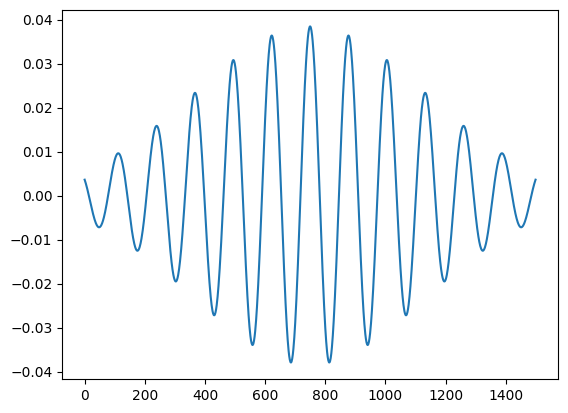

In [22]:
plt.plot(network.banks[i].wavelets[j])


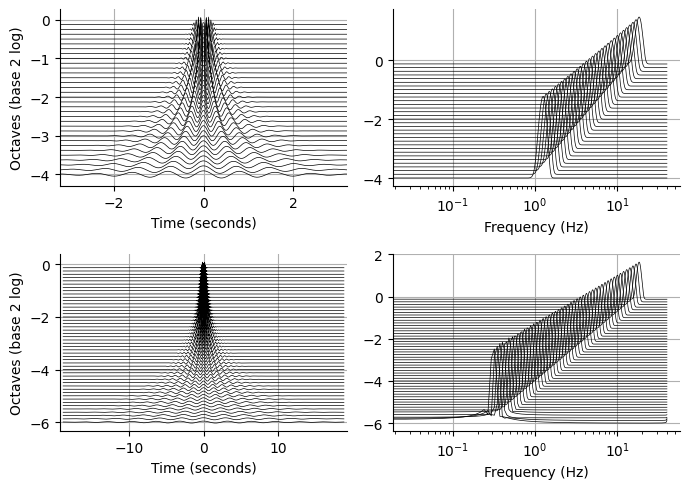

In [23]:

# Loop over network layers
#plt.figure(figsize=(10,5))

#cc = low_pass_filter(2000, sigma = 0.2)
fig, ax = plt.subplots(2, 2, figsize=(7,5),  )


for i, bank in enumerate(network.banks):

    # Create axes (left for temporal, right for spectral domain)
    
    ii = 0
    # Show each wavelet
    for wavelet, spectrum, ratio in zip(
        bank.wavelets[:], bank.spectra[:], bank.ratios[:]
    ):

        # Time domain
        ax[i,0].plot(bank.times, wavelet.real + ratio, c= 'k', lw = 0.5)
        #ax[i,0].plot(bank.times, wavelet.imag + ratio, c='r', lw = 0.5)

        # Spectral domain (log of amplitude)
        ax[i,1].plot(bank.frequencies, np.log(np.abs(spectrum) + 1) + ratio, c = 'k', lw = 0.5)
        #ax[i,2].plot(bank.frequencies, np.log(np.abs(spectrum*cc[1000:]) + 1) + ratio, c = 'b', lw = 0.5)
        
    #ax[0,1].plot(bank.frequencies, np.log(np.abs(cc[1000:]) + 1) -0.25, c = 'r', lw = 0.5)

    # Limit view to three times the temporal width of largest wavelet
    width_max = 2 * bank.widths.max()

    # Labels
    
    
    ax[i,0].set_ylabel("Octaves (base 2 log)")
    ax[i,0].set_xlabel("Time (seconds)")
    ax[i,0].set_xlim(-width_max, width_max)
    ax[i,0].grid()
    ax[i,1].set_xscale("log")
    ax[i,1].set_xlabel("Frequency (Hz)")
    ax[i,1].grid()

    #ax[i, 0].set_xlim(0.1, 50)
    #  
    #ax[i,2].set_xscale("log")
    #ax[i,2].set_xlabel("Frequency (Hz)")
    #ax[i,2].grid()
    #ax[i, 1].set_xlim(0.1, 50)
    
    ii = ii+1

for axn in ax.flat:
    axn.spines['top'].set_visible(False)
    axn.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

fig.tight_layout()
#fig.savefig(savepath + f'filterbank.pdf', transparent=True, dpi = 300)




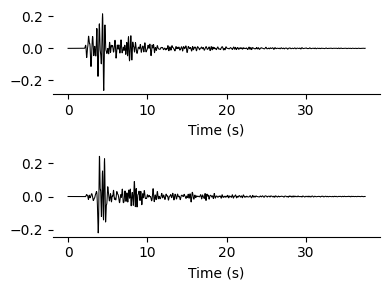

In [24]:

time = np.arange(0, data.shape[-1], 1) / sr
indxvs = np.arange(120*65).reshape(120, 65)

indx = [15, 35, 55, 75, 95]


fig, axs = plt.subplots(2, 1, figsize = (4, 3))

axs[0].plot(time, data[indxvs[75, 30], 0, :].T,lw = 0.75, c = 'k')

axs[1].plot(time, data[indxvs[75, 30], 1, :].T,lw = 0.75, c = 'k')


ax = axs[0]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Time (s)')

ax = axs[1]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Time (s)')

fig.tight_layout()
#fig.savefig(savepath + f'seismograms.pdf', transparent=True)



In [25]:
segments = [data[i,:,:] for i in indxvs[indx, 30]]


sc1 = network.transform(segments,  reduce_type= None )



In [26]:
time = np.arange(0, data.shape[-1], 1) / sr
indxvs = np.arange(120*65).reshape(120, 65)

indx = [15, 35, 55, 75, 95]



In [27]:

def reader_coeff(data):
    sc = [data['order_1'], data['order_2']]

    #sc = [scm2['order_1'], scm2['order_2']]
    for i in range(len(network.banks[0].centers)):
        
        # if network.banks[0].centers[i]>=10:

        #      sc[0][:,:, i] = np.nan
        #      sc[1][:,:, i,:] = np.nan

        n = network.banks[0].centers[i] <= network.banks[1].centers  # Find the center of the wavelet in the second layer that is closest to the center of the wavelet in the first layer
        sc[1][:,:, i, n] = np.nan
    
    return sc






pooling = np.median


scm = np.load('/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_normalized_l2_wavelet_unnormalized'+ pooling.__name__+ '.npz')

scm1 = np.load('/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_normalized_l2_wavelet_unnormalized'+ pooling.__name__+'horzontal'+ '.npz')

scm2 = np.load('/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_normalized_l2_wavelet_unnormalized'+ pooling.__name__ +'newdata'+ '.npz')


#scm_unnorm = reader_coeff(scm2)
#scm_coda = reader_coeff(scm3)
scm_norm_0 = reader_coeff(scm)


scm_norm_1 = reader_coeff(scm1)

scm_norm_2 = reader_coeff(scm2)



/tmp/ipykernel_793807/1040515856.py:62: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
/tmp/ipykernel_793807/1040515856.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


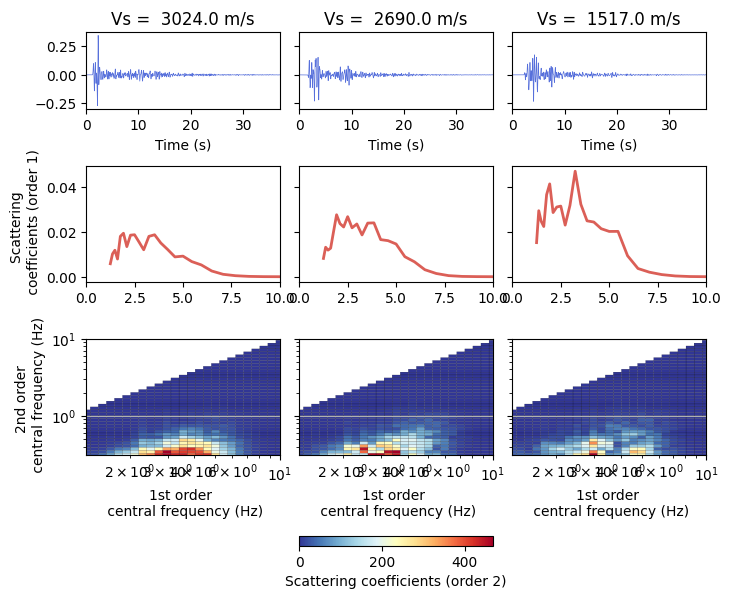

In [28]:

sc = scm_norm_1.copy()


gs = {"hspace": 0.4, "wspace": 0.1, "height_ratios": [1,1.5, 3]}
fig, axs = plt.subplots(
        3, 3, figsize=(8, 7), sharex="row", sharey="row", gridspec_kw=gs
    )


offset_x = 30

trc = [35, 55, 80]

ax = axs[0].reshape(-1)

for i, ind in enumerate(trc):

    ax[i].set_title(f"Vs =  {np.ceil(vs.reshape(-1)[indxvs[ind, offset_x]])} m/s")
    ax[i].plot(np.arange(len(data[0,0,:]))/40, data[indxvs[ind, offset_x],0,:], lw = 0.5,  c = '#5770db')

    ax[i].set_xlabel('Time (s)')
    ax[i].set_xlim(0, 37)

    
ax = axs[1].reshape(-1)

for i, ind in enumerate(trc):
    ss = sc[0][indxvs[ind, offset_x]][0]
    sss = ss #- np.mean(sc[0][:, 0, :], axis = 0)
    sss = abs(sss)
    
    ax[i].plot(network.banks[0].centers, (sss), lw = 2,  c = '#db5f57')
    #ax[i].plot(np.fft.fftfreq(1500, 1/sr)[:750], abs(sp.fft.fft(data[indxvs[ind, offset_x],0,:]))[:750]/100, label = 'FFT', c = '#57db5f', lw = 2, alpha = 0.5)

    #ax[i].set_ylim(0, 0.1)
    #ax[i].plot(network.banks[0].centers, (sc2[0][indxvs[ind, offset_x]][0]), lw = 2,  c = 'k')

    #ax[i].set_xlabel('1st order \n frequency (Hz)')
    ax[i].set_xlim(0., 10)

ax[0].set_ylabel("Scattering \n coefficients (order 1)")
            
ax = axs[2].reshape(-1)

for i, ind in enumerate(trc):

    ss = (sc[1][indxvs[ind, offset_x]][0])
    #ss[np.isnan(ss)] = 0 
    sss = ss #- np.mean(sc[1][:, 0, : ,:], axis = 0) 
    sss = abs(sss)
    img = ax[i].pcolor(network.banks[0].centers, network.banks[1].centers, ((sss.T)*1000), cmap = 'RdYlBu_r', rasterized=True, edgecolors='k', linewidths=0.1)
    
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 10)

    ax[i].grid(True)

    ax[i].set_xlabel('1st order \n central frequency (Hz)')

    cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
    cb.set_label("Scattering coefficients (order 2)")
    if i != 1:
        cb.ax.set_visible(False)


ax[0].set_ylabel('2nd order \n central frequency (Hz)')

fig.tight_layout()

plt.savefig(savepath + "Coefficients" + ".png", bbox_inches="tight", dpi=300, transparent=True,)



/tmp/ipykernel_793807/4050549418.py:63: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
/tmp/ipykernel_793807/4050549418.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


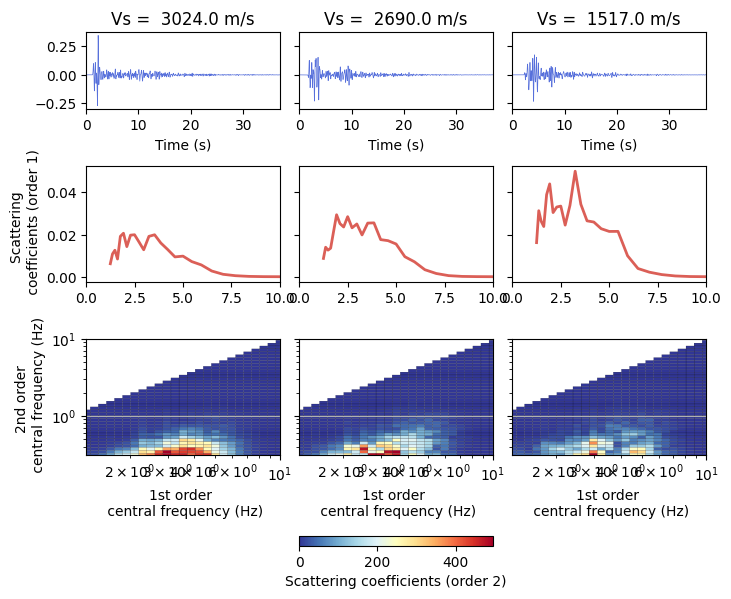

In [29]:

sc = scm_norm_2.copy()


gs = {"hspace": 0.4, "wspace": 0.1, "height_ratios": [1,1.5, 3]}
fig, axs = plt.subplots(
        3, 3, figsize=(8, 7), sharex="row", sharey="row", gridspec_kw=gs
    )


offset_x = 30

trc = [35, 55, 80]

ax = axs[0].reshape(-1)

for i, ind in enumerate(trc):

    ax[i].set_title(f"Vs =  {np.ceil(vs.reshape(-1)[indxvs[ind, offset_x]])} m/s")
    ax[i].plot(np.arange(len(data[0,0,:]))/40, data[indxvs[ind, offset_x],0,:], lw = 0.5,  c = '#5770db')

    ax[i].set_xlabel('Time (s)')
    ax[i].set_xlim(0, 37)

    
ax = axs[1].reshape(-1)


for i, ind in enumerate(trc):
    ss = sc[0][indxvs[ind, offset_x]][0]
    sss = ss #- np.mean(sc[0][:, 0, :], axis = 0)
    sss = abs(sss)
    
    ax[i].plot(network.banks[0].centers, (sss), lw = 2,  c = '#db5f57')
    #ax[i].plot(np.fft.fftfreq(1500, 1/sr)[:750], abs(sp.fft.fft(data[indxvs[ind, offset_x],0,:]))[:750]/100, label = 'FFT', c = '#57db5f', lw = 2, alpha = 0.5)

    #ax[i].set_ylim(0, 0.1)
    #ax[i].plot(network.banks[0].centers, (sc2[0][indxvs[ind, offset_x]][0]), lw = 2,  c = 'k')

    #ax[i].set_xlabel('1st order \n frequency (Hz)')
    ax[i].set_xlim(0., 10)

ax[0].set_ylabel("Scattering \n coefficients (order 1)")
            
ax = axs[2].reshape(-1)

for i, ind in enumerate(trc):

    ss = (sc[1][indxvs[ind, offset_x]][0])
    #ss[np.isnan(ss)] = 0 
    sss = ss #- np.mean(sc[1][:, 0, : ,:], axis = 0) 
    sss = abs(sss)
    img = ax[i].pcolor(network.banks[0].centers, network.banks[1].centers, ((sss.T)*1000), cmap = 'RdYlBu_r', rasterized=True, edgecolors='k', linewidths=0.1)
    
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 10)

    ax[i].grid(True)

    ax[i].set_xlabel('1st order \n central frequency (Hz)')

    cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
    cb.set_label("Scattering coefficients (order 2)")
    if i != 1:
        cb.ax.set_visible(False)


ax[0].set_ylabel('2nd order \n central frequency (Hz)')

fig.tight_layout()

plt.savefig(savepath + "Coefficients" + ".png", bbox_inches="tight", dpi=300, transparent=True,)


In [30]:

def normalizing(scattering_coefficients, sil = 5):
    
    ss = scattering_coefficients.copy()
    
    c1 = ss[0].copy()
    c2 = ss[1].copy()

    c2hat = c2/ (np.nanmedian(c1, -1) + sil + 0* np.nanmax(c1, -1) )[:,:,np.newaxis , np.newaxis] 

    c2hat[np.isnan(scattering_coefficients[1])] == np.nan
    
    return [c1, c2hat]


In [94]:


def normalizing(scattering_coefficients, sil = 5):
    
    ss = scattering_coefficients.copy()
    
    c1 = ss[0].copy()
    c2 = ss[1].copy()

    c2hat = c2/ (np.nanmedian(c1, -1) + sil + 0* np.nanmax(c1, -1) )[:,:,np.newaxis , np.newaxis] 

    c2hat[np.isnan(scattering_coefficients[1])] == np.nan
    
    return [c1, c2hat]
    



from sklearn.preprocessing import RobustScaler, MinMaxScaler, normalize, PowerTransformer, QuantileTransformer, StandardScaler

hfreq = 0

def process__(scc, indx = None):
    
    #sc = normalizing(scc, sil = np.mean(scc[0]) * 1)

    sc = scc.copy()

    if indx == None:
        indx = np.arange(sc[0].shape[1])
        order_1 = sc[0][:, ::1, hfreq:]
        order_2 = sc[1][:, ::1, hfreq:, :]

    elif indx == 'avg':
        order_1 = np.nanmedian(sc[0][:, ::1, ::1], axis = 1)#[:, : , ::1]
        order_2 = np.nanmedian(sc[1][:, ::1, ::1, ::1], axis = 1)#[: , :, ::1, 10:]

    else:
        indx = indx
        order_1 = sc[0][:, indx, hfreq:]
        order_2 = sc[1][:, indx, hfreq:, :]

    #print(order_1)

    #scc = normalizing(sc, sil = 1e-1)

    order_1 = order_1.reshape(order_1.shape[0] , -1)
    order_2 = order_2.reshape(order_2.shape[0], -1)
    
    coeff =  np.hstack((order_1, order_2 ))
    
    coeff =  np.log((coeff[:, :]) + 1e-2)# * np.nanmax(coeff))

    coef = np.nan_to_num(coeff, 0)
    minmaxmodel = MinMaxScaler(feature_range = (-1, 1)).fit(coef)

    coef = minmaxmodel.transform(coef)

    #coef  = RobustScaler().fit_transform(coef)
    
    # coef = QuantileTransformer(
    #         output_distribution="uniform", random_state=42
    #     ).fit_transform(coef)
    

    return coef, minmaxmodel


#scm_norm = reader_coeff(scm1)
#scm_unnorm = reader_coeff(scm2)
#scm_coda = reader_coeff(scm3)


In [95]:

def Reduceing(model, data, n):

    reducing_model = model(n_components= n , random_state = 0,)# max_iter= 1000, tol = 1e-20)
    features = reducing_model.fit_transform(data)
    iv  = reducing_model.inverse_transform(features)

    varaince = explained_variance_score(data, iv)

    return features, varaince, reducing_model

from string import ascii_uppercase
    
#dd = MinMaxScaler(feature_range = (-1, 1)).fit_transform()

def heir_cluster(features, threshold = 1, CLUSTERS = 5):
    
    linkage_matrix = linkage(features, "ward", metric = 'seuclidean')
        
    META_THRESHOLD = threshold * linkage_matrix[:, 2].max()
    # Find meta cluster

    clusters =  fcluster(linkage_matrix, CLUSTERS, criterion='maxclust')
    
    
    meta_clusters  = fcluster(linkage_matrix, META_THRESHOLD, criterion="distance")
    
    cluster_indexes = np.arange(CLUSTERS) +1
    
    correspondance = np.zeros_like(cluster_indexes)
    for i, cluster in enumerate(cluster_indexes):
        correspondance[i] = np.unique(meta_clusters[clusters == cluster])[0]

    meta_clusters_labels, meta_clusters_counts = np.unique(
        correspondance, return_counts=True
    )
    labels = []
    for n in meta_clusters_counts:
        # If the cluster contains more than one sub-cluster, number them from 1 to n
        if n > 1:
            labels.extend(list(range(1, n + 1)))

        # If the cluster contains only one sub-cluster, leave it without number
        else:
            labels.append("")


    labels = [
        f"{ascii_uppercase[c - 1]}{l}" for c, l in zip(correspondance, labels)
    ]

    colors = []
    shift = 1
    for label in labels:
        if len(label) > 1:
            colors.append(f"C{ascii_uppercase.index(label[:1]) + shift}")
        else:
            shift -= 1
            colors.append("C0")
    
    #colors  = sns.color_palette("hls", np.unique(meta_clusters).shape[0])

    return linkage_matrix, clusters, colors


from scipy.cluster.hierarchy import dendrogram
from matplotlib.colors import ListedColormap


def dendo(link, CLUSTERS, ax, threshold = 0.3):

    with plt.rc_context({"lines.linewidth": 1}):
        
        return dendrogram(link ,
                CLUSTERS,
                orientation="top",
                truncate_mode="lastp",
                ax = ax,
                color_threshold = threshold * link[:, 2].max(),
                above_threshold_color="k",
                no_labels=True,
        )




def dendo2(link, CLUSTERS, ax, threshold = 0.3):

    with plt.rc_context({"lines.linewidth": 1}):
        
        return dendrogram(link ,
                CLUSTERS,
                orientation="top",
                truncate_mode="lastp",
                ax = ax,
                color_threshold = threshold,
                above_threshold_color="k",
                no_labels=True,
        )
        
         

In [96]:


coef_1, minmaxmodel = process__(scm_norm_0, indx = [6, 7])
#coef_avg = process__(scm_unnorm, indx = 'avg')
#coef_all = process__(scm_unnorm, indx = None)
coef_, minmaxmodel = process__(scm_norm_2, indx = [6, 7])

mdl = PCA

d = np.arange(1, 20, 1)

features_1, variance_1, reducing_model1 = Reduceing(mdl, coef_1, 15)
features_2, variance2, reducing_model2 = Reduceing(mdl, coef_2, 15)


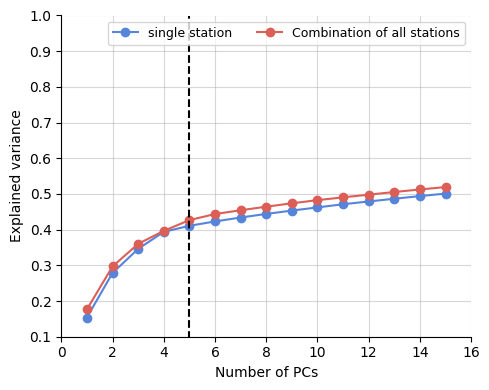

In [97]:

fig, ax = plt.subplots(1, 1, figsize = (5, 4))

#ax.plot(d, variance_4, 'o-', label = ' R3', c = "#db5f57")
#ax.plot(d, ariance_avg, 'o-', label = 'avg. of all stations', c = '#57db94')
#ax.plot(d, ariance_all, 'o-', label = 'Concat. of all stations', c = '#5784db')
#ax.plot(d, ariance_all, 'o-', label = 'Concat. of all stations', c = '#5784db')
ax.plot(np.arange(15)+1, np.cumsum(reducing_model1.explained_variance_ratio_[:15]), 'o-', label = 'single station', c = '#5784db')

ax.plot(np.arange(15)+1, np.cumsum(reducing_model2.explained_variance_ratio_[:15]), 'o-', label = 'Combination of all stations', c = '#db5f57')


ax.set_xlabel('Number of PCs')
ax.set_ylabel('Explained variance')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend( fontsize = 9 , ncol = 2)
ax.vlines(5, 0.,1.1, linestyle = '--', color = 'k')
ax.set_xlim(0, 16)
ax.set_ylim(0.1, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim([0, 15])
ax.grid(alpha = 0.5)

plt.tight_layout()

plt.savefig(savepath + 'explained_variance.pdf', dpi = 300, transparent=True)



In [98]:
#np.asarray(ariance_norm)


In [467]:

coef_1, minmaxmodel = process__(scm_norm_0, indx = [6, 7])
#coef_avg = process__(scm_unnorm, indx = 'avg')
#coef_all = process__(scm_unnorm, indx = None)
coef_2, minmaxmodel = process__(scm_norm_2, indx = [6, 7])

mdl = PCA

NCOMPT = 5

features__1, variance__1, _ = Reduceing(mdl, coef_1, NCOMPT)

features__2, variance__2, reducing_model2_2 = Reduceing(mdl, coef_2, NCOMPT)


In [468]:
features__2, variance__2, reducing_model2_2 = Reduceing(mdl, coef_2, NCOMPT)

#features__2[:, [3,2,1,4]] = 0 
#features__2[:,  0] = 0



In [469]:

dt = reducing_model2_2.inverse_transform(features__2)

dt = minmaxmodel.inverse_transform(dt)
dt = np.exp(dt) - 1e-2
dtsc1 = dt[:, :64].reshape(7800, 2, 32)

dtsc2 = dt[:, 64:].reshape(7800, 2, 32, 48)



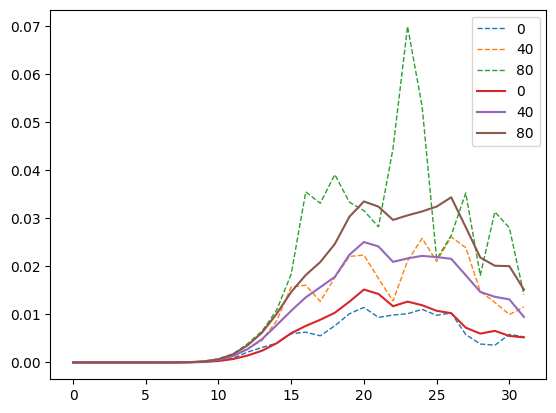

In [470]:

#plt.plot(dtsc1[indxvs[6, 7], 0, :], c = 'r')
plt.plot(sc[0][indxvs[::40, 25], 0, :].T, label = np.arange(120)[::40] , lw = 1, linestyle = '--')

plt.plot(dtsc1[indxvs[::40, 25], 0, :].T, label = np.arange(120)[::40] )
plt.legend()



In [471]:

dtsc2[1000]


array([[[9.90000000e-01, 1.26471750e-13, 2.25992836e-13, ...,
         1.18802605e-04, 1.27374373e-04, 1.34256352e-04],
        [9.90000000e-01, 9.90000000e-01, 9.24172197e-13, ...,
         1.26322747e-04, 1.35565240e-04, 1.43003359e-04],
        [9.90000000e-01, 9.90000000e-01, 9.90000000e-01, ...,
         1.35830997e-04, 1.45933110e-04, 1.54084596e-04],
        ...,
        [9.90000000e-01, 9.90000000e-01, 9.90000000e-01, ...,
         1.29974238e-02, 2.79626705e-02, 5.41636418e-02],
        [9.90000000e-01, 9.90000000e-01, 9.90000000e-01, ...,
         5.74765369e-03, 1.09525548e-02, 2.30552589e-02],
        [9.90000000e-01, 9.90000000e-01, 9.90000000e-01, ...,
         4.80527563e-03, 6.61797532e-03, 1.08146938e-02]],

       [[9.90000000e-01, 3.50079341e-13, 6.27359276e-13, ...,
         2.68121252e-05, 2.87512341e-05, 3.03081837e-05],
        [9.90000000e-01, 9.90000000e-01, 2.46934417e-12, ...,
         2.94282456e-05, 3.15873117e-05, 3.33240797e-05],
        [9.90000000e-01, 

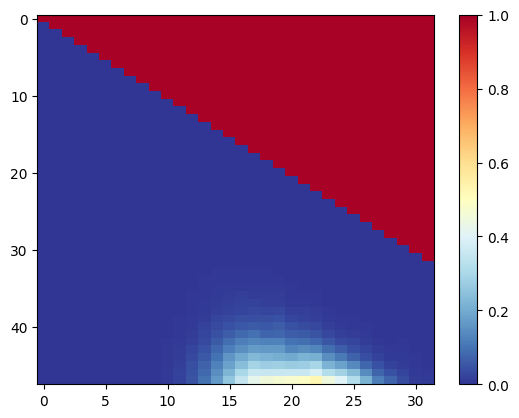

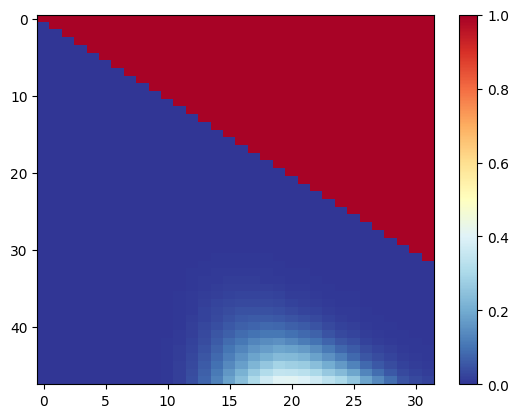

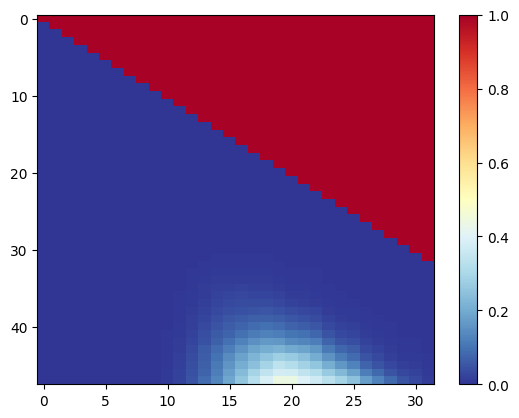

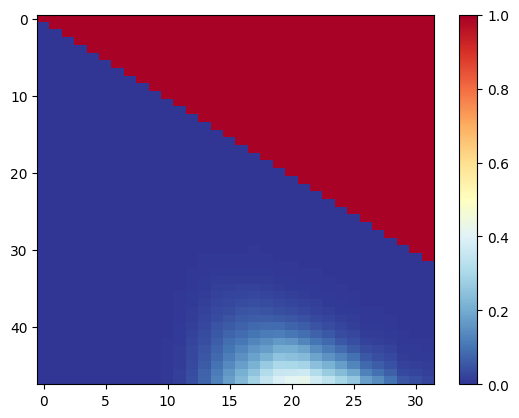

In [472]:
for i in indxvs[::30, 45]:
    plt.figure()
    plt.imshow(dtsc2[i, 0, :, :].T, aspect = 'auto', cmap = 'RdYlBu_r',  vmax = 1)
    #plt.imshow(np.log(dtsc2[i, 0, :, :].T), aspect = 'auto', cmap = 'RdYlBu_r', vmin = -20 )

    plt.colorbar()


/tmp/ipykernel_793807/2572105335.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


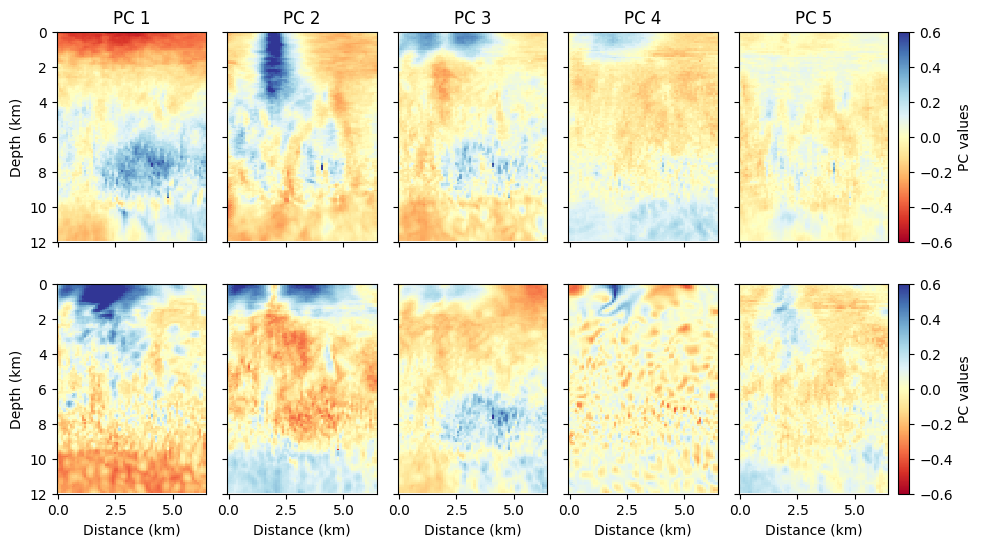

In [502]:

gs = {"hspace": 0.2, "wspace": 0.0}

fig, axs = plt.subplots(2, NCOMPT, figsize = (NCOMPT *2.2 , 6), sharey =True, sharex = True,  gridspec_kw=gs)
axs = axs

vmax = 0.6
vmin = -vmax
CMAP = 'RdYlBu'

ax = axs[0]

features__1 = features__1/features__1.max()


for i in range(NCOMPT):
    fch = features__1[:, i] 
    #fch = fch/fch.max()
    im1 = ax[i].pcolor(np.arange(65)/10, np.arange(120)[::1]/10, (fch.reshape(120, 65)), cmap = CMAP,  vmin = vmin, vmax = vmax,  rasterized = True)
    ax[i].set_ylim(12, 0)
    divider = make_axes_locatable(ax[i])
    ax[i].set_title(f'PC {i+1}')


    cax1 = divider.append_axes('right', size='7.5%', pad=0.1, )
    cbar = fig.colorbar(im1, cax=cax1, orientation='vertical', pad=0.3, label = f'PC values')

    if i != 4:
        cbar.ax.set_visible(False)

ax[0].set_ylabel('Depth (km)')

features__2 = features__2 / features__2.max()

ax = axs[1]


#ax[0].set_title(f'Concat. of all stations \n Explained var.: {variance_all:.2f}')

for i in range(NCOMPT):
    im1 = ax[i].pcolor(np.arange(65)/10, np.arange(120)[::1]/10, (features__2[:, i].reshape(120, 65)), cmap = CMAP,  vmin = vmin, vmax = vmax,  rasterized = True)
    ax[i].set_ylim(12,  0)

    divider = make_axes_locatable(ax[i])

    cax1 = divider.append_axes('right', size='7.5%', pad=0.1, )
    cbar = fig.colorbar(im1, cax=cax1, orientation='vertical', pad=0.3, label = f'PC values')

    if i != 4:
        cbar.ax.set_visible(False)

    ax[i].set_xlabel('Distance (km)')
ax[0].set_ylabel('Depth (km)')


plt.tight_layout()

plt.savefig(savepath + 'PCA_components.png', dpi = 300, transparent=True)



In [344]:
# CLUSTERS = 50
# threshold = 0.4


# from sklearn.metrics import silhouette_samples, silhouette_score

# range_n_clusters = [2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
# sil2 = []

# featureforsill = features__1
# #featureforsill = features__1

# for i in range_n_clusters:

#     #X, variance_norm = Reduceing(mdl, coef_all, i)

#     linkage_1, clusters_1, colors_1 = heir_cluster(featureforsill, threshold = threshold, CLUSTERS = i)

#     print(np.unique(clusters_1)) 
#     #cluster_labels = clustering_norm

#     silhouette_avg = silhouette_score(featureforsill, clusters_1 )

#     sil2.append(silhouette_avg)



In [503]:


import seaborn as sns

cmap2 = sns.color_palette("hls", 7)

print(cmap2.as_hex())



['#db5f57', '#dbd057', '#75db57', '#57dbaa', '#579bdb', '#8557db', '#db57c0']


In [504]:

cmap2

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.8169142857142857, 0.33999999999999997),
 (0.4573714285714283, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.6683428571428571),
 (0.33999999999999997, 0.6059428571428571, 0.86),
 (0.5197714285714281, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.7545142857142858)]

In [505]:

features__1.shape    

(7800, 5)

In [506]:
CLUSTERS = 50

threshold = 0.75


linkage_1, clusters_1, colors_1 = heir_cluster(features__1, threshold = threshold, CLUSTERS = CLUSTERS)
#linkage_2, clusters_2, colors_2 = heir_cluster(features_avg, threshold = threshold, CLUSTERS = CLUSTERS)
#linkage_3, clusters_3, colors_3 = heir_cluster(features_all, threshold = threshold, CLUSTERS = CLUSTERS)

threshold = 0.64

linkage_2, clusters_2, colors_2 = heir_cluster((features__2[:, :]), threshold = threshold, CLUSTERS = CLUSTERS)



#linkage_4, clusters_4, colors_4 = heir_cluster(np.mean(features__1[:, :], axis = -1, keepdims=True), threshold = threshold, CLUSTERS = CLUSTERS)



Text(0, 0.5, 'Seismic cluster')

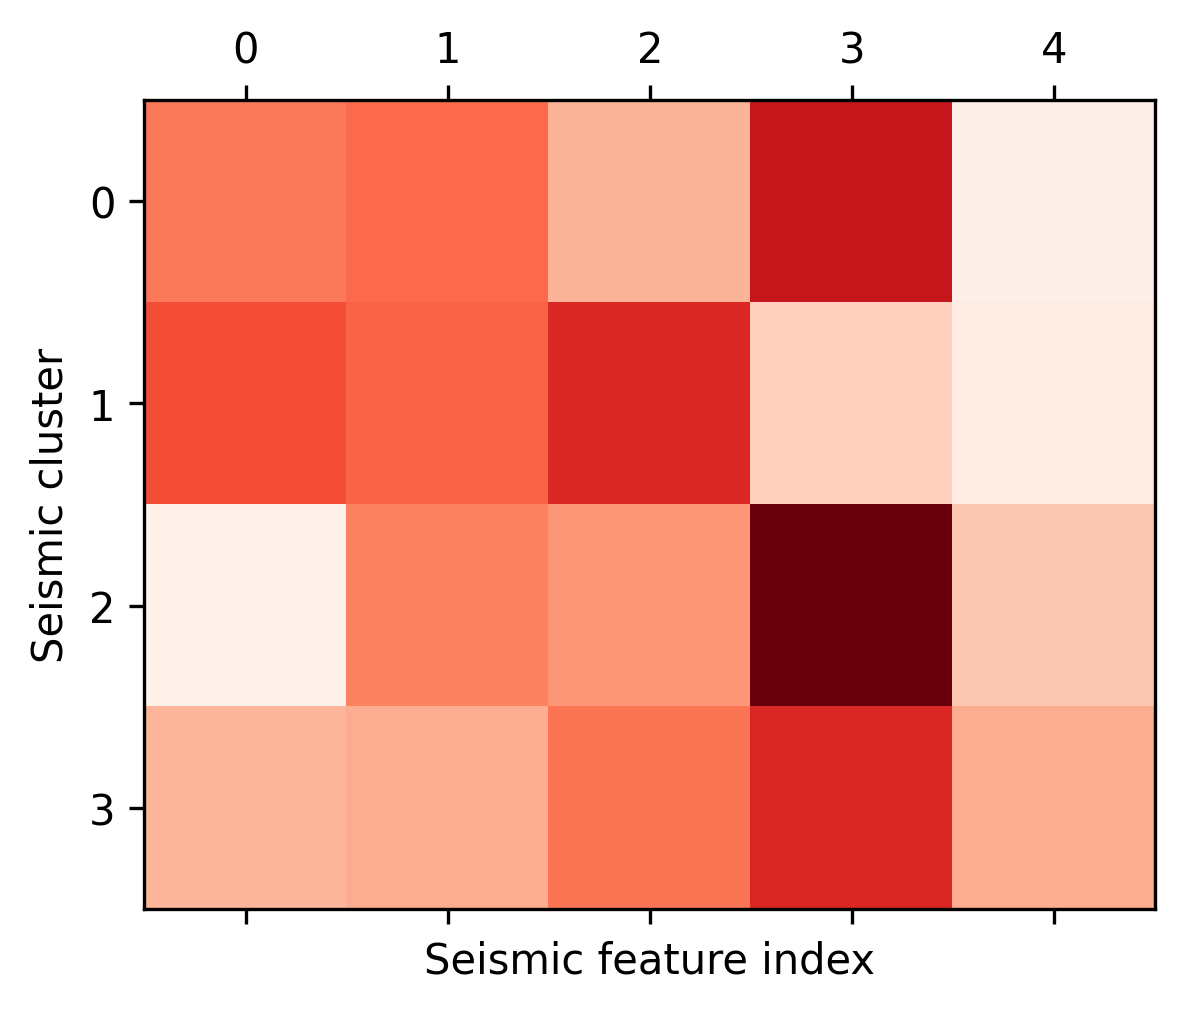

In [507]:

CLUSTERS = 4

threshold = 0.75

threshold = 0.6

features_main = features__1

linkage_c, cluster_main, colors_c = heir_cluster((features_main[:, :]), threshold = threshold, CLUSTERS = CLUSTERS)




# Matrix of cluster centers
n_features = features_main.shape[1]

clusters_centers = np.zeros((CLUSTERS, n_features))

# Calculate centroids
for i in range(CLUSTERS):
    clusters_centers[i, :] = np.mean(features_main[np.where(cluster_main == i+1)[0]], 0)

clusters_centers /= np.abs(clusters_centers).sum(axis=1)[:, None]
isort = np.argsort(np.argmax(np.abs(clusters_centers), axis=0))
cluster_centers = clusters_centers[:, isort]


# Figure
fig, ax = plt.subplots(1, figsize=(4.5, 3.5), dpi=300)

# Plot
img = ax.matshow(np.abs(cluster_centers), cmap="Reds", vmin=0)
ax.set_xlabel("Seismic feature index")
ax.set_ylabel("Seismic cluster")



In [508]:

t = np.arange(len(data[0,0,:]))/40

In [509]:
def hilbet(sig, smooth = 10, order = 1):

    envelope = abs(sp.signal.hilbert(sig))
    return sp.signal.savgol_filter(envelope, smooth, order)





In [510]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


3381.32
0.14977186952627347


/tmp/ipykernel_793807/916149714.py:96: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(img, cax=axins1, orientation="horizontal" )
/tmp/ipykernel_793807/916149714.py:118: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (m/s)")


3313.0798
0.05607662035434002
2428.2866
0.05504001282764148
2847.2764
0.04961742888490539


/tmp/ipykernel_793807/916149714.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


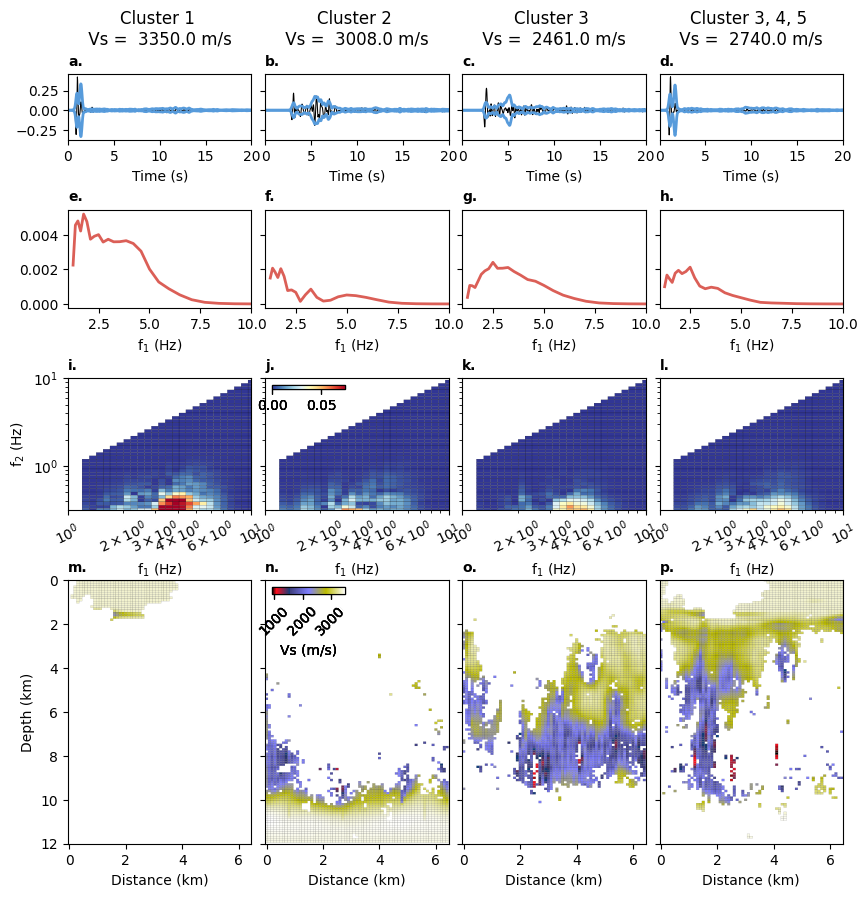

In [513]:

ntrc = 1
palette = sns.color_palette("flare", n_colors=ntrc)

sc = scm_norm_1
indxtrc = 8

gs = {"hspace": 0.5, "wspace": 0.075, "height_ratios": [1,1.5, 2., 4]}
fig, axs = plt.subplots(
        4, CLUSTERS, figsize=(CLUSTERS * 2.5, 10), sharex="row", sharey="row", gridspec_kw=gs
    )

for cluster_index in range(CLUSTERS):
    # Get cluster center
    centroid = clusters_centers[cluster_index]

    in_cluster = np.where(cluster_main == cluster_index + 1)[0]
    
    features_in = features_main[in_cluster]
    distances = np.linalg.norm(features_in - centroid, axis=1)
    
    sorted = distances.argsort()
    sorted = in_cluster[sorted]

    coeff1 = sc[0][sorted]
    coeff2 = sc[1][sorted]
    
    print(np.median(vs.reshape(-1)[sorted]))

    ax = axs[0]
    ax[cluster_index].set_title(f"Cluster {cluster_index + 1} \n Vs =  {np.ceil(np.mean(vs.reshape(-1)[sorted]))} m/s \n")

    if cluster_index == 3:
        ax[cluster_index].set_title(f"Cluster 3, 4, 5 \n Vs =  {np.ceil(np.mean(vs.reshape(-1)[sorted]))} m/s \n")


    #ax[i].set_title(f"Vs =  {np.ceil(vs.reshape(-1)[indxvs[ind, offset_x]])} m/s")
    #[ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, hilbet(data[sorted[0], i, :].T, smooth = 5), lw = 0.75, c = 'r') for i in range(ntrc)]
    #[ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, -hilbet(data[sorted[0], i, :].T, smooth = 5), lw = 0.75, c = 'r') for i in range(ntrc)]

    [ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, data[sorted[0], 2, :].T, lw = 0.75, alpha = 1, c = 'k') for i in range(ntrc)]

    ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, np.mean(hilbet(data[sorted[0], :, :], smooth = 5), 0).T, lw = 2, c = '#579bdb')
    ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, -np.mean(hilbet(data[sorted[0], :, :], smooth = 5), 0).T, lw =2, c = '#579bdb')


    ax[cluster_index].set_xlabel('Time (s)')

    ax[cluster_index].set_xlim(0, 20)
    #ax[cluster_index].set_xlim(1, 20)

    ax = axs[1]


    ss = abs(np.mean(np.mean((coeff1 - np.mean(np.mean(sc[0], 0), 0)), 0), 0))
    sss = (np.std(np.std(abs(coeff1 - np.mean(np.mean(sc[0], 0), 0)), 0), 0))

    
    #ssstd = abs(np.std(coeff1, 0)[indxtrc]) #- np.mean(sc[0], axis = 0)[indxtrc])

    #ss = abs(np.mean(np.mean(coeff1, 0), axis =0 ) - np.mean(np.mean(sc[0], axis = 0), axis = 0))
    ax[cluster_index].plot(network.banks[0].centers, (ss), lw = 2,  c = '#db5f57')
    
    #ax[cluster_index].fill_between(network.banks[0].centers, ss - sss, ss + sss, alpha=0.2)


    #ax[cluster_index].plot(network.banks[0].centers, (ss), lw = 3,  c = '#db5f57')
    ax[cluster_index].set_xlim(1, 10)
    ax[cluster_index].set_xlabel('f$_{1}$ (Hz)')


    ax = axs[2]

    ss = abs((np.mean(coeff2, 0)[indxtrc]) - (np.mean(sc[1], axis = 0)[indxtrc]))
    #ss = np.log(ss)
    print(np.nanmax(ss))
    img = ax[cluster_index].pcolor(network.banks[0].centers, network.banks[1].centers, ((ss.T)), vmin = 0, vmax = 0.075,  cmap = 'RdYlBu_r', rasterized=True, edgecolors='k', linewidths=0.1 ) 
    ax[cluster_index].set_xscale("log")
    ax[cluster_index].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 10)
    ax[cluster_index].set_xlim(1, 10)
    ax[0].set_ylabel('f$_{2}$ (Hz)')
    ax[cluster_index].set_xlabel('f$_{1}$ (Hz)')
    ax[cluster_index].tick_params(axis="x", which="both", rotation=25)

    axins1 = inset_axes(
        ax[1],
        width="40%",  # width: 50% of parent_bbox width
        height="2.5%",  # height: 5%
        loc="upper left",
    )

    axins1.tick_params(axis="x", which="both", rotation = 0)

    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(img, cax=axins1, orientation="horizontal" )


    ax = axs[3]

    vss = np.zeros_like(vs).reshape(-1)
    vss[:] = np.nan
    vss[in_cluster] = vs.reshape(-1)[in_cluster]
    #vss[in_cluster] = cluster_index

    im1 = ax[cluster_index].pcolor(np.arange(65)/10, np.arange(120)[::1]/10, vss.reshape(120, 65)[::1,], vmin = vs.min(), vmax = vs.max(), cmap = 'gist_stern', edgecolors='k', linewidths=0.05, rasterized = True)
    ax[cluster_index].set_ylim(12, 0)
    axins1 = inset_axes(
        ax[1],
        width="40%",  # width: 50% of parent_bbox width
        height="2.5%",  # height: 5%
        loc="upper left",
    )

    axins1.tick_params(axis="x", which="both", rotation=45)

    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (m/s)")
    ax[cluster_index].set_xlabel('Distance (km)')
    ax[0].set_ylabel('Depth (km)')

titname = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for i in range(len(axs.reshape(-1))):
    axs.reshape(-1)[i].set_title(titname[i]+'.', loc = 'left', fontsize = 10, fontweight = 'bold')


fig.tight_layout()

fig.savefig(savepath + "clusters_centroid_old" + ".png", bbox_inches="tight", dpi=300, transparent=True,)


IndexError: index 3 is out of bounds for axis 0 with size 3

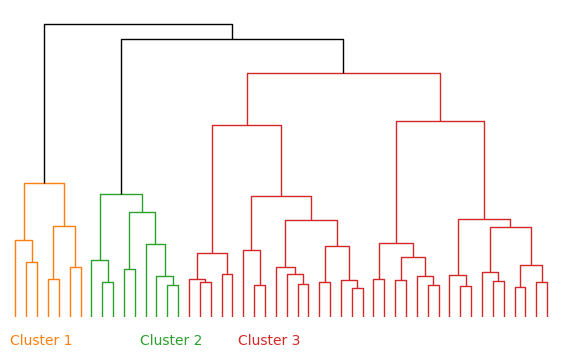

In [372]:

fig, ax = plt.subplots(1, figsize=(7, 4))
threshold = 0.67

link = linkage_c

r = dendo2(link, 50, ax, threshold = link[:, 2][-CLUSTERS+1])

#ax.set_ylim(0, link[:, 2].max() * 2)

ax.set_axis_off()
colors = np.unique(r['leaves_color_list'])

ax.text(0, -10,'Cluster 1', rotation = 0, c = colors[0])
ax.text(120, -10,'Cluster 2', rotation = 0, c = colors[1])
#ax.text(225, 50,'Cluster 3', rotation = 90, c = colors[2])
#ax.text(295, 40,'Cluster 4', rotation = 90, c = colors[3])
ax.text(210, -10,'Cluster 3', rotation = 0, c = colors[2])
ax.text(350, -10,'Cluster 4', rotation = 0, c = colors[3])
#ax.text(400, -10,'Cluster 5', rotation = 0, c = colors[4])

#ax.text(440, 60,'Cluster 6', rotation = 90, c = colors[4])

fig.tight_layout()

fig.savefig(savepath + "dendrogram_old" + ".png", bbox_inches="tight", dpi=300, transparent=True,)


Text(0, 0.5, 'Seismic cluster')

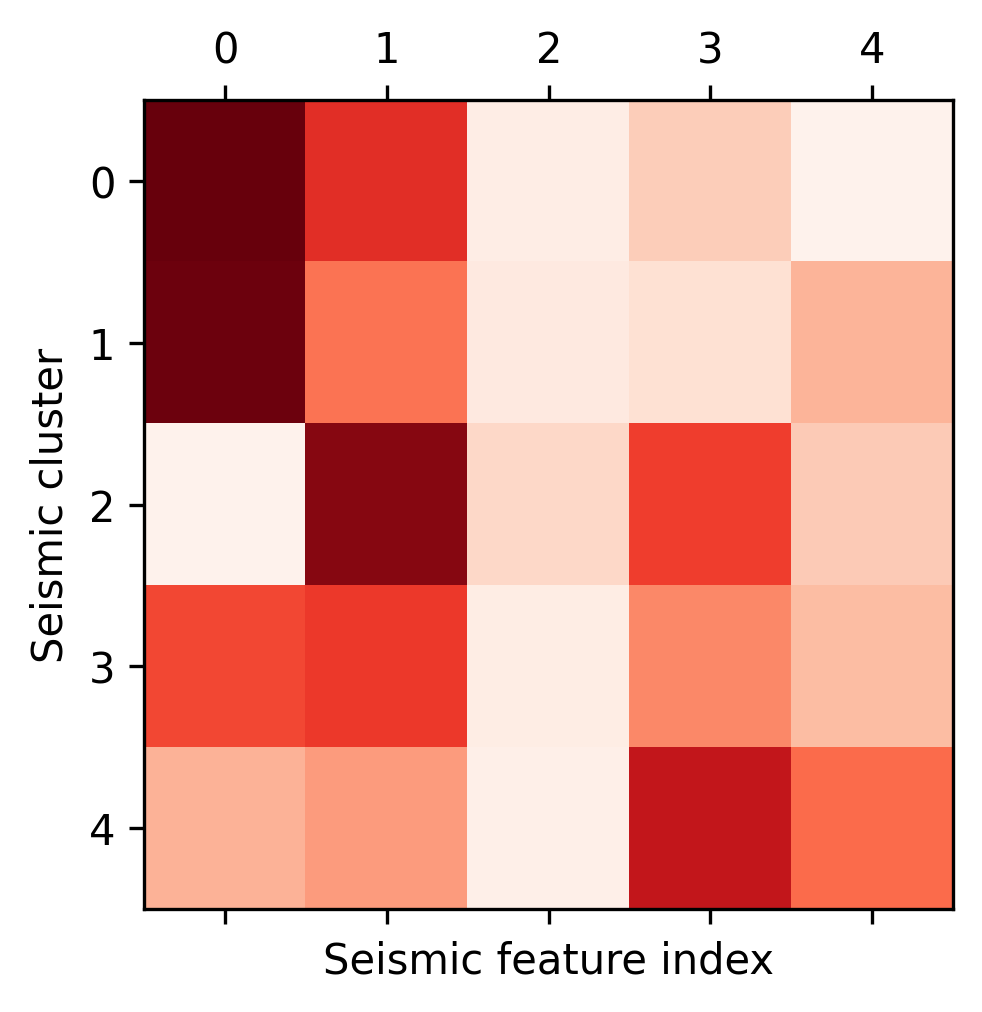

In [514]:

CLUSTERS = 5

threshold = 0.75

threshold = 0.6


features_main = features__2

linkage_c, cluster_main, colors_c = heir_cluster((features_main[:, :]), threshold = threshold, CLUSTERS = CLUSTERS)


# Matrix of cluster centers
n_features = features_main.shape[1]

clusters_centers = np.zeros((CLUSTERS, n_features))

# Calculate centroids
for i in range(CLUSTERS):
    clusters_centers[i, :] = np.mean(features_main[np.where(cluster_main == i+1)[0]], 0)

clusters_centers /= np.abs(clusters_centers).sum(axis=1)[:, None]
isort = np.argsort(np.argmax(np.abs(clusters_centers), axis=0))
cluster_centers = clusters_centers[:, isort]


# Figure
fig, ax = plt.subplots(1, figsize=(4.5, 3.5), dpi=300)

# Plot
img = ax.matshow(np.abs(cluster_centers), cmap="Reds", vmin=0)
ax.set_xlabel("Seismic feature index")
ax.set_ylabel("Seismic cluster")



In [515]:
sc[0].shape, sc[1].shape

((7800, 10, 32), (7800, 10, 32, 48))

3381.321
0.1467529382117279


/tmp/ipykernel_793807/4165663279.py:97: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(img, cax=axins1, orientation="horizontal" )
/tmp/ipykernel_793807/4165663279.py:119: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (m/s)")


2941.864
0.044477853524889754
2250.0747
0.06937404339749137
2817.0024
0.0743182260535265
3161.1577
0.02880442028757957


/tmp/ipykernel_793807/4165663279.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


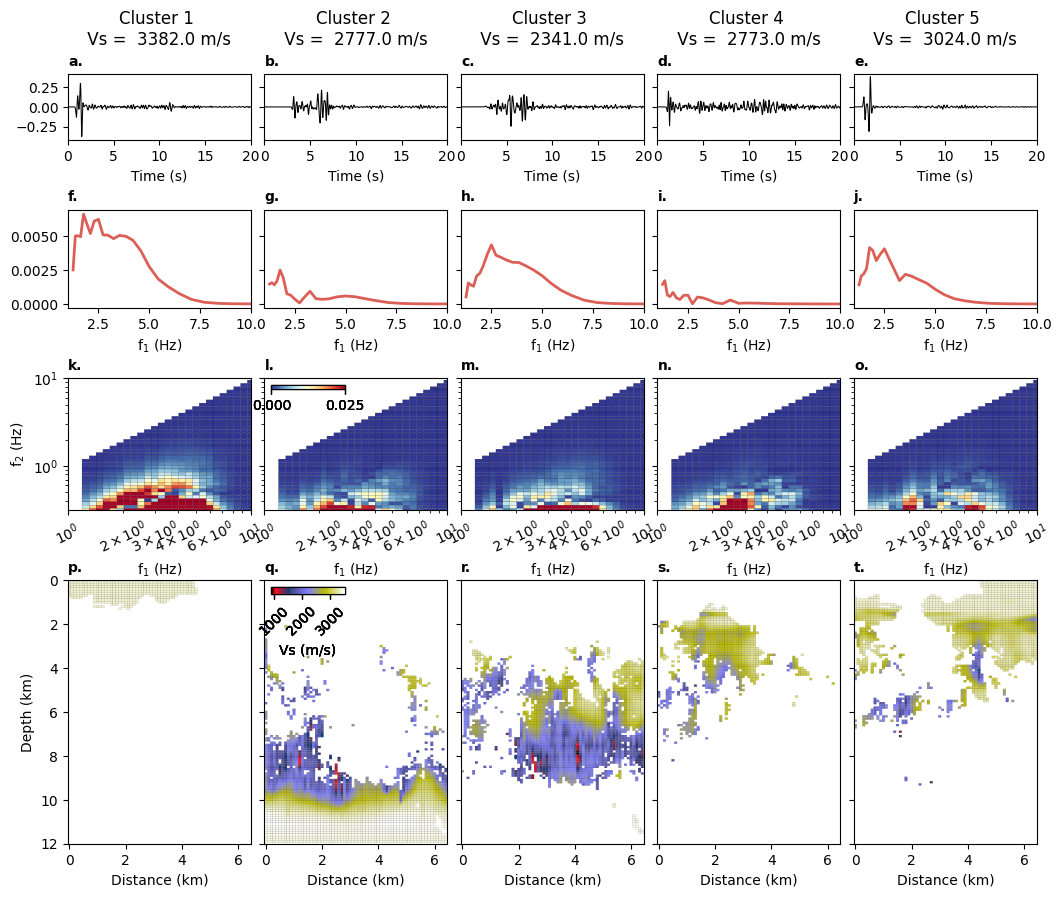

In [518]:

ntrc = 1
palette = sns.color_palette("flare", n_colors=ntrc)

sc = scm_norm_2
indxtrc = 8

gs = {"hspace": 0.5, "wspace": 0.075, "height_ratios": [1,1.5, 2., 4]}
fig, axs = plt.subplots(
        4, CLUSTERS, figsize=(CLUSTERS * 2.5, 10), sharex="row", sharey="row", gridspec_kw=gs
    )

for cluster_index in range(CLUSTERS):
    # Get cluster center
    centroid = clusters_centers[cluster_index]

    in_cluster = np.where(cluster_main == cluster_index + 1)[0]
    
    features_in = features_main[in_cluster]
    distances = np.linalg.norm(features_in - centroid, axis=1)
    
    sorted = distances.argsort()
    sorted = in_cluster[sorted]

    coeff1 = sc[0][sorted]
    coeff2 = sc[1][sorted]
    
    print(np.median(vs.reshape(-1)[sorted]))

    ax = axs[0]
    ax[cluster_index].set_title(f"Cluster {cluster_index + 1} \n Vs =  {np.ceil(np.mean(vs.reshape(-1)[sorted]))} m/s \n")

    #if cluster_index == 3:
    #    ax[cluster_index].set_title(f"Cluster 3, 4, 5 \n Vs =  {np.ceil(np.mean(vs.reshape(-1)[sorted]))} m/s \n")


    #ax[i].set_title(f"Vs =  {np.ceil(vs.reshape(-1)[indxvs[ind, offset_x]])} m/s")
    #[ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, hilbet(data[sorted[0], i, :].T, smooth = 5), lw = 0.75, c = 'r') for i in range(ntrc)]
    #[ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, -hilbet(data[sorted[0], i, :].T, smooth = 5), lw = 0.75, c = 'r') for i in range(ntrc)]

    [ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, data[sorted[0], i, :].T, lw = 0.75, alpha = 1, c = 'k') for i in range(ntrc)]

    # ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, np.mean(hilbet(data[sorted[0], :, :], smooth = 5), 0).T, lw = 2, c = '#579bdb')
    # ax[cluster_index].plot(np.arange(len(data[0,0,:]))/40, -np.mean(hilbet(data[sorted[0], :, :], smooth = 5), 0).T, lw =2, c = '#579bdb')


    ax[cluster_index].set_xlabel('Time (s)')

    ax[cluster_index].set_xlim(0, 20)
    #ax[cluster_index].set_xlim(1, 20)

    ax = axs[1]


    ss = abs(np.mean(np.mean((coeff1 - np.mean(np.mean(sc[0], 0), 0)), 0), 0))
    sss = (np.std(np.std(abs(coeff1 - np.mean(np.mean(sc[0], 0), 0)), 0), 0))

    
    #ssstd = abs(np.std(coeff1, 0)[indxtrc]) #- np.mean(sc[0], axis = 0)[indxtrc])

    #ss = abs(np.mean(np.mean(coeff1, 0), axis =0 ) - np.mean(np.mean(sc[0], axis = 0), axis = 0))
    ax[cluster_index].plot(network.banks[0].centers, (ss), lw = 2,  c = '#db5f57')
    
    #ax[cluster_index].fill_between(network.banks[0].centers, ss - sss, ss + sss, alpha=0.2)


    #ax[cluster_index].plot(network.banks[0].centers, (ss), lw = 3,  c = '#db5f57')
    ax[cluster_index].set_xlim(1, 10)
    ax[cluster_index].set_xlabel('f$_{1}$ (Hz)')


    ax = axs[2]

    ss = abs((np.mean(coeff2, 0)[indxtrc]) - (np.mean(sc[1], axis = 0)[indxtrc]))

    #ss = np.log(ss)
    print(np.nanmax(ss))
    img = ax[cluster_index].pcolor(network.banks[0].centers, network.banks[1].centers, ((ss.T)), vmin = 0, vmax = 0.025,  cmap = 'RdYlBu_r', rasterized=True, edgecolors='k', linewidths=0.1 ) 
    ax[cluster_index].set_xscale("log")
    ax[cluster_index].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 10)
    ax[cluster_index].set_xlim(1, 10)
    ax[0].set_ylabel('f$_{2}$ (Hz)')
    ax[cluster_index].set_xlabel('f$_{1}$ (Hz)')
    ax[cluster_index].tick_params(axis="x", which="both", rotation=25)

    axins1 = inset_axes(
        ax[1],
        width="40%",  # width: 50% of parent_bbox width
        height="2.5%",  # height: 5%
        loc="upper left",
    )

    axins1.tick_params(axis="x", which="both", rotation = 0)

    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(img, cax=axins1, orientation="horizontal" )


    ax = axs[3]

    vss = np.zeros_like(vs).reshape(-1)
    vss[:] = np.nan
    vss[in_cluster] = vs.reshape(-1)[in_cluster]
    #vss[in_cluster] = cluster_index

    im1 = ax[cluster_index].pcolor(np.arange(65)/10, np.arange(120)[::1]/10, vss.reshape(120, 65)[::1,], vmin = vs.min(), vmax = vs.max(), cmap = 'gist_stern', edgecolors='k', linewidths=0.05, rasterized = True)
    ax[cluster_index].set_ylim(12, 0)
    axins1 = inset_axes(
        ax[1],
        width="40%",  # width: 50% of parent_bbox width
        height="2.5%",  # height: 5%
        loc="upper left",
    )

    axins1.tick_params(axis="x", which="both", rotation=45)

    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (m/s)")
    ax[cluster_index].set_xlabel('Distance (km)')
    ax[0].set_ylabel('Depth (km)')

titname = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for i in range(len(axs.reshape(-1))):
    axs.reshape(-1)[i].set_title(titname[i]+'.', loc = 'left', fontsize = 10, fontweight = 'bold')


fig.tight_layout()

fig.savefig(savepath + "clusters_centroid_new" + ".png", bbox_inches="tight", dpi=300, transparent=True,)


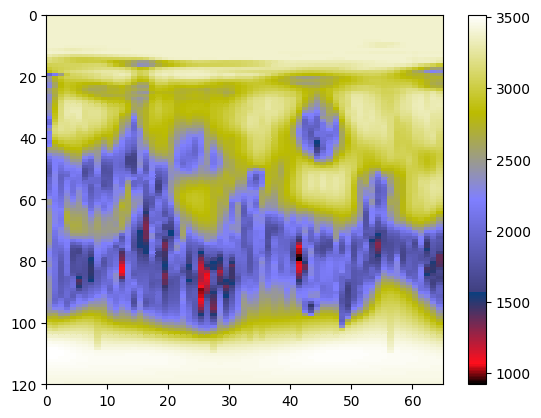

In [520]:

plt.pcolor(vs.reshape(120, 65), cmap = 'gist_stern')
plt.ylim(120, 0)
plt.colorbar()

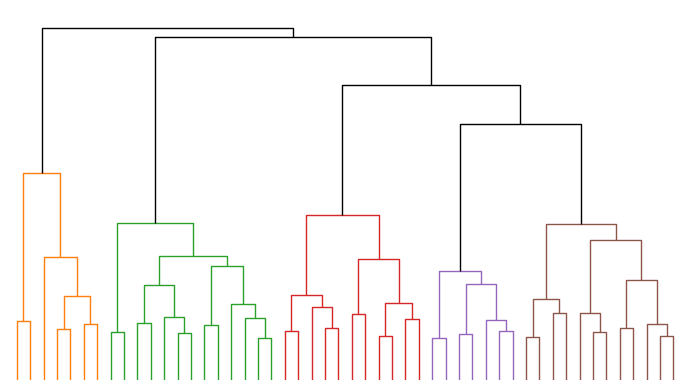

In [380]:

fig, ax = plt.subplots(1, figsize=(7, 4))
threshold = 0.67

link = linkage_c

r = dendo2(link, 50, ax, threshold = link[:, 2][-CLUSTERS+1])

#ax.set_ylim(0, link[:, 2].max() * 2)

ax.set_axis_off()
colors = np.unique(r['leaves_color_list'])

# ax.text(0, -10,'Cluster 1', rotation = 0, c = colors[0])
# ax.text(120, -10,'Cluster 2', rotation = 0, c = colors[1])
# #ax.text(225, 50,'Cluster 3', rotation = 90, c = colors[2])
# #ax.text(295, 40,'Cluster 4', rotation = 90, c = colors[3])
# ax.text(210, -10,'Cluster 3', rotation = 0, c = colors[2])
# ax.text(350, -10,'Cluster 4', rotation = 0, c = colors[3])
#ax.text(400, -10,'Cluster 5', rotation = 0, c = colors[4])

#ax.text(440, 60,'Cluster 6', rotation = 90, c = colors[4])

fig.tight_layout()

fig.savefig(savepath + "dendrogram" + ".png", bbox_inches="tight", dpi=300, transparent=True,)


In [801]:


offset_x = 30

trc = [35, 55, 80]

ax = axs[0].reshape(-1)


    


for i, ind in enumerate(trc):
    ss = sc[0][indxvs[ind, offset_x]][0]
    sss = ss #- np.mean(sc[0][:, 0, :], axis = 0)
    sss = abs(sss)
    
    ax[i].plot(network.banks[0].centers, (sss), lw = 2,  c = '#db5f57')
    #ax[i].plot(np.fft.fftfreq(1500, 1/sr)[:750], abs(sp.fft.fft(data[indxvs[ind, offset_x],0,:]))[:750]/100, label = 'FFT', c = '#57db5f', lw = 2, alpha = 0.5)

    #ax[i].set_ylim(0, 0.1)
    #ax[i].plot(network.banks[0].centers, (sc2[0][indxvs[ind, offset_x]][0]), lw = 2,  c = 'k')

    #ax[i].set_xlabel('1st order \n frequency (Hz)')
    ax[i].set_xlim(0., 10)

ax[0].set_ylabel("Scattering \n coefficients (order 1)")
            
ax = axs[2].reshape(-1)

for i, ind in enumerate(trc):

    ss = (sc[1][indxvs[ind, offset_x]][0])
    #ss[np.isnan(ss)] = 0 
    sss = ss #- np.mean(sc[1][:, 0, : ,:], axis = 0) 
    sss = abs(sss)
    img = ax[i].pcolormesh(network.banks[0].centers, network.banks[1].centers, ((sss.T)*1000), cmap = 'RdYlBu_r', rasterized=True ) 
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 10)

    ax[i].grid(True)

    ax[i].set_xlabel('1st order \n central frequency (Hz)')

    cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
    cb.set_label("Scattering coefficients (order 2)")
    if i != 1:
        cb.ax.set_visible(False)



fig.tight_layout()

plt.savefig(savepath + "Coefficients" + ".png", bbox_inches="tight", dpi=300, transparent=True,)



/tmp/ipykernel_3347563/1099770505.py:45: UserWarning: Adding colorbar to a different Figure <Figure size 1250x1000 with 26 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
/tmp/ipykernel_3347563/1099770505.py:45: UserWarning: Adding colorbar to a different Figure <Figure size 1250x1000 with 27 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
/tmp/ipykernel_3347563/1099770505.py:45: UserWarning: Adding colorbar to a different Figure <Figure size 1250x1000 with 28 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)


<Figure size 640x480 with 0 Axes>

In [802]:
#scm_norm = reader_coeff(scm1)
#scm_unnorm = reader_coeff(scm2)
#scm_coda = reader_coeff(scm3)

coef_1 = process__(scm_unnorm, indx = None)
coef_2 = process__(scm_norm, indx = None)

#coef_2  = RobustScaler().fit_transform(coef_2.T).T

coef_3 = process__(scm_coda, indx = None)



mdl = FastICA

NCOMPT = 2


features__1, variance_1 = Reduceing(mdl, coef_2, NCOMPT)
features__2, variance_2 = Reduceing(mdl, coef_3, NCOMPT)

features__3, variance_3 = Reduceing(mdl, coef_3, NCOMPT)

variance_1, variance_2, variance_3



NameError: name 'scm_unnorm' is not defined

/tmp/ipykernel_190263/901393868.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


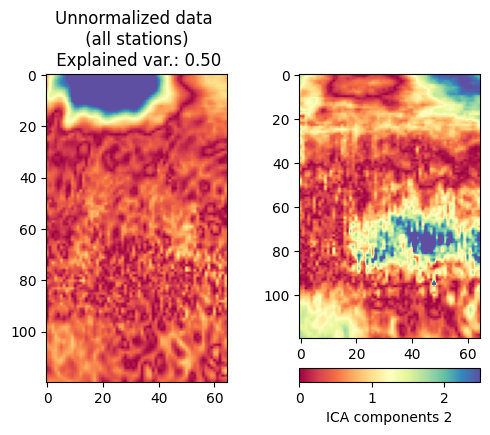

In [34]:
gs = {"hspace": 0.2, "wspace": 0.4}

fig, axs = plt.subplots(1,2, figsize = (5.6, 4), gridspec_kw=gs)
axs = axs.T

vmax = 2.5
vmin = 0
CMAP = 'Spectral'
ax = axs


ax[0].set_title(f'Unnormalized data \n (all stations) \n Explained var.: {variance_1:.2f}')

for i in range(2):

    im1 = ax[i].imshow(abs(features__1[:, i].reshape(120, 65)), cmap = CMAP, aspect = 'auto', vmin = vmin, vmax = vmax)

divider = make_axes_locatable(ax[i])
cax1 = divider.append_axes('bottom', size='5%', pad=0.3, )
cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', pad=0.35, label = f'ICA components {i+1}')


ax = axs[1]



#ax[0].set_title(f'Late-coda normalization \n (all stations) \n Explained var.: {variance_2:.2f}')


#for i in range(2):
#    im1 = ax[i].imshow(features__2[:, i].reshape(120, 65), cmap = CMAP, aspect = 'auto', vmin = vmin, vmax = vmax)

#divider = make_axes_locatable(ax[i])
#cax1 = divider.append_axes('bottom', size='5%', pad=0.3, )
#cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', pad=0.35, label = f'ICA components {i+1}')


# ax = axs[2]

# ax[0].set_title(f'Concat. of all sources \n Explained var.: {variance_3:.2f}')

# for i in range(2):
#     im1 = ax[i].imshow(features_3[:, i].reshape(120, 65), cmap = CMAP, aspect = 'auto', vmin = vmin, vmax = vmax)
#     divider = make_axes_locatable(ax[i])
#     cax1 = divider.append_axes('bottom', size='5%', pad=0.3, )
#     cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', pad=0.35, label = f'ICA components {i+1}')

plt.tight_layout()

plt.savefig(savepath + 'ICA_components_normalized.pdf', dpi = 300, transparent=True)



In [ ]:
CLUSTERS = 50
threshold = 0.28

linkage_1, clusters_1, colors_1 = heir_cluster(features__1, threshold = threshold, CLUSTERS = CLUSTERS)
linkage_2, clusters_2, colors_2 = heir_cluster(features__2, threshold = threshold, CLUSTERS = CLUSTERS)



In [ ]:



gs = {"hspace": 0.01, "wspace": 0.4, "height_ratios": [0.5,3]}
fig, axss = plt.subplots(
        2, 2, figsize=(5, 4.5),  gridspec_kw=gs
    )


axss = axss.T


axs = axss[0]
axs[0].set_axis_off()
im1 = axs[1].imshow(vs.reshape(120, 65), cmap = 'Spectral', aspect = 'auto')
divider = make_axes_locatable(axs[1])
cax1 = divider.append_axes('top', size='5%', pad=0.3, )
cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', pad=0.35, )

cbar.set_label('Vs (m/s)', labelpad=-40, y=1.05, rotation=0)



for axs, link, clus, colls in zip(axss[1:,:], [linkage_1 ], [clusters_1], [ colors_1]):

    ax = axs[0]
    dendo(link, CLUSTERS, ax, threshold = threshold)

    ax.set_axis_off()
    #plt.vlines(META_THRESHOLD, 0, 1000, colors='r', linestyles='dashed')

    ax = axs[1]

    
        
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('top', size='5%', pad=0.3, )
    

    cmap = ListedColormap(colls)

    im1 = ax.imshow(clus.reshape(120, 65),cmap = cmap, aspect='auto', rasterized=True)
    #plt.colorbar(im, ax = cax1)

    cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', pad=0.35)
    cbar.set_ticklabels([])

    #ax.set_axis_off()

fig.tight_layout()
fig.savefig(savepath + 'clustering_normalized.pdf', dpi = 300, transparent=True)


In [ ]:

#plt.plot(range_n_clusters, sil, 'o-')
plt.plot(range_n_clusters, sil2, 'o-')

In [ ]:

range_n_clusters

In [ ]:

gs = {"hspace": 0.01, "wspace": 0.2, "height_ratios": [0.5,3]}
fig, axss = plt.subplots(
        2, 2, figsize=(6, 6),  gridspec_kw=gs
    )

axss = axss.T

for axs, link, clus, colls in zip(axss, [linkage_unnorm, linkage_norm ], [clusters_unnorm, clusters_norm], [ colors_unnorm, colors_norm]):

    ax = axs[0]
    dendo(link, CLUSTERS, ax, threshold = 0.3)

    ax.set_axis_off()
    #plt.vlines(META_THRESHOLD, 0, 1000, colors='r', linestyles='dashed')

    ax = axs[1]


        
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('top', size='5%', pad=0.3, )
    


    cmap = ListedColormap(colls)

    im1 = ax.imshow(clus.reshape(120, 65),cmap = cmap, aspect='auto', rasterized=True)
    #plt.colorbar(im, ax = cax1)

    cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', pad=0.35)
    cbar.set_ticklabels([])

    #ax.set_axis_off()


In [ ]:
coefficients_unnorm.shape

In [ ]:

d = np.arange(2, 14, 1)

variance_coda_all = []
for i in d:

    features_coda, variance_coda = Reduceing(mdl, coefficients_norm, i)
    variance_coda_all.append(variance_coda)

#clustering_coda = clustering(features_coda, threshold = threshold, CLUSTERS = CLUSTERS)


In [ ]:

plt.plot(d, variance_coda_all)


In [ ]:
fig, axs = plt.subplots(1,NCOMPT , figsize = (NCOMPT*2, 5))

for i in range(NCOMPT):
    
    ax = axs[i]
    im = ax.imshow(features_unorm[:, i].reshape(120, 65), aspect = 'auto', cmap = 'RdYlBu_r')
    plt.colorbar(im, ax = ax, orientation = 'horizontal', label = 'ICA 1')
    

In [ ]:
threshold = None#0.25

CLUSTERS = 8
clustering_norm = clustering(features_norm, threshold = threshold, CLUSTERS = CLUSTERS)
clustering_unorm = clustering(features_unorm, threshold = threshold, CLUSTERS = CLUSTERS)
clustering_coda = clustering(features_coda, threshold = threshold, CLUSTERS = CLUSTERS)



In [ ]:

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



range_n_clusters = [ 4, 5, 6, 7, 8, 9]

X = features

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3), dpi = 300)
    #fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)
    X = features_norm

    clustering_norm = clustering(X, threshold = threshold, CLUSTERS = n_clusters)

    cluster_labels = clustering_norm

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space (1st)")
    # ax2.set_ylabel("Feature space (2nd)")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering with n_clusters = %d"
        % n_clusters,
        fontweight="bold",
    )


    plt.tight_layout()

    #plt.savefig(savepath+f'silhouette_{i}.png', bbox_inches="tight", dpi=300)

    plt.show()





In [ ]:
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

gs = {"hspace": 0.4, "wspace": 0.2}
fig, axs = plt.subplots(1, 2,  dpi = 300, figsize = (6, 4), sharex = True, sharey = True, gridspec_kw=gs)

for i, modelcluster in enumerate(zip([clustering_unorm, clustering_norm], ['Unnormalized data', 'Normalized data'])):
    
    ax = axs[i]

    clusters = modelcluster[0]
    
    im1 = ax.imshow(clusters.reshape(120, 65), cmap = cmap, aspect='auto', rasterized=True)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_title(f"{modelcluster[1]}")

    
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes('bottom', size='5%', pad=0.2)
    cmap = ListedColormap(sns.color_palette("Spectral", len(np.unique(clusters))).as_hex())
    cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', label = "Clusters", pad=0.35)
    bounds = ['', '2', '5','8']
    #cbar.set_ticklabels(bounds)


    #ax.set_title(f"Variance explained: {explained_variance_score(data, data):.2f}")

#ax.set_xlabel('Component 1')
#ax.set_ylabel('Component 2')

fig.tight_layout()
fig.savefig(savepath + "clustering2" + ".png", bbox_inches="tight", dpi=300, transparent=True,)
plt

In [ ]:


cmap = sns.diverging_palette(230, 30, as_cmap=True)
#cmap = sns.color_palette("mako", as_cmap=True)
#cmap = sns.color_palette("magma", as_cmap=True)
#cmap = sns.cubehelix_palette(as_cmap=True)
#cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
cmap = sns.color_palette("Spectral", as_cmap=True)

cmap2 = sns.color_palette("rocket")
cmap2 = sns.color_palette("ch:s=-.2,r=.6", )
#cmap2 = sns.color_palette("coolwarm")
cmap = 'RdYlBu'
cmap = plt.get_cmap('tab10', len(np.unique(clusters)))

cmap = ListedColormap(sns.color_palette("Spectral", len(np.unique(clusters))).as_hex())


fig, ax = plt.subplots( dpi = 300, figsize = (2, 3))

divider = make_axes_locatable(ax)
cax1 = divider.append_axes('bottom', size='5%', pad=0.05)


# im1 = ax[0].imshow(-u2[:, 0].reshape(120, 65), cmap = cmap, aspect='auto', )
# im2 = ax[1].imshow(u2[:, 1].reshape(120, 65), cmap = cmap, aspect='auto', )

#feature = np.sqrt(features[:, 0]**2 + features[:, 1]**2)

im1 = ax.imshow(clusters.reshape(120, 65), cmap = cmap, aspect='auto', rasterized=True)

# im1 = ax[0].imshow(features[:, 0].reshape(120, 65), cmap = cmap, aspect='auto', )
# im2 = ax[1].imshow(features[:, 1].reshape(120, 65), cmap = cmap, aspect='auto', )



cbar = fig.colorbar(im1, cax=cax1, orientation='horizontal', label = "Clusters", pad=0.35)


#fig.colorbar(im2, cax=cax2, orientation='horizontal', label = "low-dimensional space \n (2nd component)")

#yticks = np.linspace(0, len(np.unique(clusters))+4, 3 )[:-1] +0.5


#yticks[0] = 0.5
#yticks[1] = 3.5
#yticks[1] = 6.5

#yticks += (yticks[1] - yticks[0]) / 2


#cbar.set_ticks(yticks, labels=['LVZ',  'HVZ'])
ax.axis('off')


#ax[1].axis('off')

fig.tight_layout()
fig.savefig(savepath + f'cluster_best.pdf', transparent=True)



In [ ]:
fig, axs = plt.subplots(1,N_CLUSTERS , figsize = (N_CLUSTERS*2, 5))

for i in range(N_CLUSTERS):
    ax = axs[i]
    im = ax.imshow(features[:, i].reshape(120, 65), aspect = 'auto', cmap = 'RdYlBu_r')
    plt.colorbar(im, ax = ax, orientation = 'horizontal', label = 'ICA 1')
    

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

im = ax.scatter(features[:, 0], features[:, 1], c = vs.reshape(-1), cmap = 'BrBG', s = 3, alpha = 0.75, rasterized=True)

#plt.colorbar(im, ax = ax,  orientation = 'vertical', label = 'Shear wave \n velocty (m/s)')
ax.set_xlabel('ICA 1')
ax.set_ylabel('ICA 2')

plt.tight_layout()

plt.savefig(savepath + "PCA" + ".pdf", bbox_inches="tight", dpi=300, transparent=True,)


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

im = ax.scatter(features[:, 0], features[:, 1], c = vs.reshape(-1), cmap = 'RdBu', s = 3, alpha = 0.75, rasterized=True)

plt.colorbar(im, ax = ax,  orientation = 'vertical', label = 'Shear wave \n velocty (m/s)')
ax.set_xlabel('ICA 1')
ax.set_ylabel('ICA 2')

plt.tight_layout()

plt.savefig(savepath + "PCA2" + ".pdf", bbox_inches="tight", dpi=300, transparent=True,)


In [ ]:

import seaborn as sns

cmap2 = sns.color_palette("hls", 3)

print(cmap2.as_hex())




In [ ]:

    fit2 = umap.UMAP(densmap=False,
        n_neighbors = 30, 
        min_dist = 0.,
        n_components = 2,
        random_state = 42,

        )

    u2 = fit2.fit_transform(
        
        #features[:,:],
        cofficients[:,:],
        #np.abs(c['sc']).reshape(7800,-1)
        )
        

In [ ]:
gs = {"hspace": 0.1, "wspace": 0.1, "width_ratios": [1, 1]}
cmap = sns.color_palette("Spectral", as_cmap=True)

fig, axs = plt.subplots(1, 2, figsize = (6, 5), sharey=True, )

ax = axs[0]
gain = 3
lnrwidth=10

pcm = ax.imshow((u2[:,0].reshape(120, 65)), cmap = cmap, aspect='auto', rasterized=True,)

fig.colorbar(pcm, ax=ax,  fraction=0.08, pad=0.1, orientation='horizontal', label = 'UMAP 1')
#ax.contour(X, Y, vs, cmap = 'flag', alpha = 0.75 , linewidths = 0.75 )

ax = axs[1]

pcm = ax.imshow((u2[:, 1].reshape(120, 65)), cmap = cmap, aspect='auto',
)

cbar = fig.colorbar(pcm, ax=ax,  fraction=0.08, pad=0.1, orientation='horizontal', label = 'UMAP 2')

plt.savefig(savepath + "umap__2d" + ".pdf", bbox_inches="tight", dpi=300, transparent=True,)


In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

im = ax.scatter(u2[:, 0], u2[:, 1], c = vs.reshape(-1), cmap = 'RdBu', s = 3, alpha = 0.75, rasterized=True)
ax.title
plt.colorbar(im, ax = ax,  orientation = 'vertical', label = 'Shear wave \n velocty (m/s)')
ax.set_xlabel('ICA 1')
ax.set_ylabel('ICA 2')

plt.tight_layout()

plt.savefig(savepath + "umap_test" + ".pdf", bbox_inches="tight", dpi=300, transparent=True,)



In [ ]:

fig_localdim, axs_localdim = plt.subplots(1, )


local_dims = umap.plot.diagnostic(fit2, diagnostic_type='local_dim', ax = axs_localdim, local_variance_threshold=0.7)



fig.savefig(savepath+f'local_dim.png', bbox_inches="tight", dpi=300 , transparent=True)

In [ ]:
ax=fig_localdim.get_axes()[0]

x_r=ax.collections[0].get_offsets()[:,0]
y_r=ax.collections[0].get_offsets()[:,1]

z_r=ax.collections[0].get_array()

plt.figure(dpi =300, figsize = (5, 3.5))

plt.scatter(x_r, y_r, c = z_r, s = 0.5, cmap = 'RdBu')

cbar = plt.colorbar()
cbar.set_label('V$_{s}$ (m/s)', rotation=270)
cbar.ax.get_yaxis().labelpad = 15

plt.xlabel('Component 1')
plt.ylabel('Component 2')

#plt.title(f'n_neighbors = {20}, min_dist = {min_dist}')

plt.savefig(savepath+f'local_dimensionality.png', bbox_inches="tight", dpi=300)



In [ ]:


ax=fig_localdim.get_axes()[0]

x_r=ax.collections[0].get_offsets()[:,0]
y_r=ax.collections[0].get_offsets()[:,1]

z_r=ax.collections[0].get_array()

fig2, axs = plt.subplots(1,1, figsize= (4, 3), dpi =300)

pcm = axs.imshow(z_r.data.reshape(120, 65) , cmap = 'RdBu')

#plt.contour(X, Y, vs, cmap = 'flag', alpha = 0.75 , linewidths = 0.75 )

fig.colorbar(pcm, ax=axs,  fraction=0.08, pad=0.04)

fig2.savefig(savepath+f'local_dim_model.png', bbox_inches="tight", dpi=300 , transparent=True)




In [ ]:

gs = {"hspace": 0.1, "wspace": 0.1, "width_ratios": [1, 1]}
cmap = sns.color_palette("Spectral", as_cmap=True)

fig, axs = plt.subplots(1, 1, figsize = (3, 4.5), sharey=True, )

ax = axs

gain = 3
lnrwidth=10

pcm = ax.imshow( z_r.data.reshape(120, 65) , cmap = 'RdBu', aspect='auto', rasterized=True,)

fig.colorbar(pcm, ax=ax,  fraction=0.08, pad=0.1, orientation='horizontal', label = 'Local dimensionality')
#ax.contour(X, Y, vs, cmap = 'flag', alpha = 0.75 , linewidths = 0.75 )

fig.tight_layout()
fig.savefig(savepath+f'local_dim_model.pdf', bbox_inches="tight", dpi=300 , transparent=True)
